In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("C:/Project/Anaconda/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [4]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

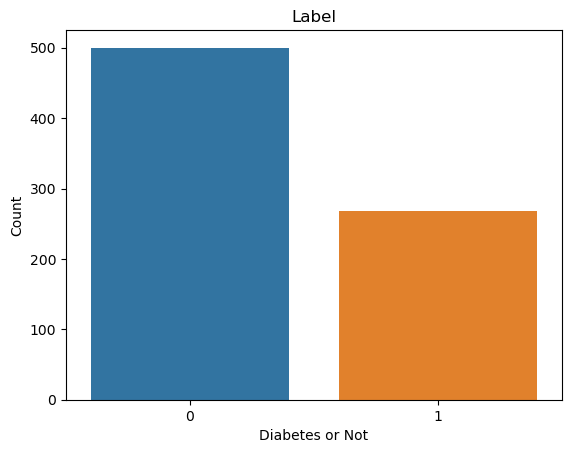

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Label")

Text(0.5, 1.0, 'Label')

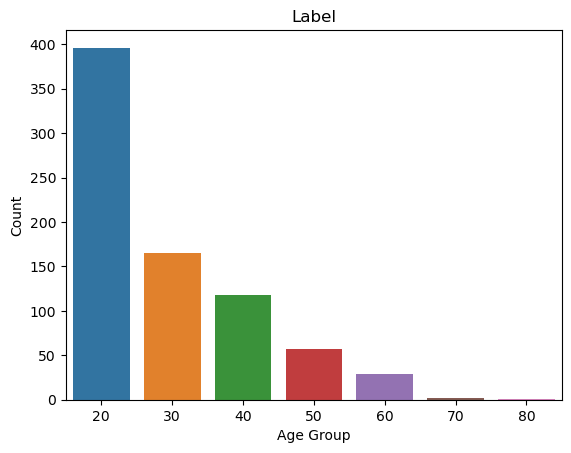

In [5]:
# Age를 10으로 나누어서 새로운 열 생성
df['Age_group'] = (df['Age'] // 10) * 10

# countplot 그리기
sns.countplot(data=df, x="Age_group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Label")

In [6]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [14]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [15]:
X=df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,50
1,85,66,29,0,26.6,0.351,31,30
8,183,64,0,0,23.3,0.672,32,30
1,89,66,23,94,28.1,0.167,21,20
0,137,40,35,168,43.1,2.288,33,30


In [16]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
Pregnancies,,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1,50
1,85,66,29,0,26.6,0.351,31,0,30
8,183,64,0,0,23.3,0.672,32,1,30
1,89,66,23,94,28.1,0.167,21,0,20
0,137,40,35,168,43.1,2.288,33,1,30
...,...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0,60
2,122,70,27,0,36.8,0.340,27,0,20
5,121,72,23,112,26.2,0.245,30,0,30


In [17]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
Pregnancies,,,,,,,,
7,150,78,29,126,35.2,0.692,54,50
4,97,60,23,0,28.2,0.443,22,20
0,165,90,33,680,52.3,0.427,23,20
1,109,56,21,135,25.2,0.833,23,20
8,120,0,0,0,30.0,0.183,38,30
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,60
7,159,66,0,0,30.4,0.383,36,30
4,94,65,22,0,24.7,0.148,21,20


In [24]:
y_train

Pregnancies
2     0
1     0
1     0
11    1
4     0
     ..
10    0
7     1
4     0
11    0
5     0
Name: Outcome, Length: 652, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
max_iter = 1000

true positive //        true negative

    TP          FP 

    FN          TN

In [38]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

pred_svm = clf_svm.predict(X_test) # 이번에는 테스트 데이터로 테스트한 값을 pred_svm에 저장

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.79870
[[97 10]
 [21 26]]


In [39]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.80519
[[96 11]
 [19 28]]


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.67532
[[80 27]
 [23 24]]


In [42]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71429
[[83 24]
 [20 27]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7987012987012987
[[91 16]
 [15 32]]


In [20]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

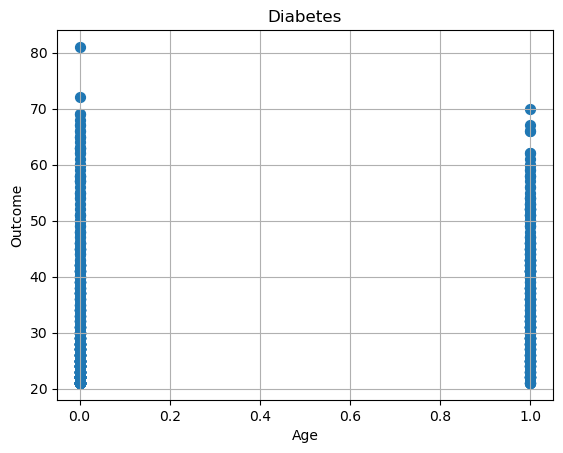

In [44]:
df.plot.scatter(x='Outcome', y='Age', marker='o', s=50)

# 그래프 제목과 축 라벨 추가
plt.title('Diabetes')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.grid('true')

# 그래프 표시
plt.show()

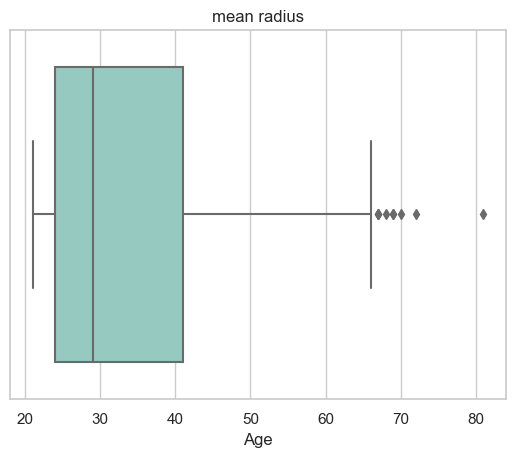

In [45]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("mean radius")
plt.show()